In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [45]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
def visualize(original, augmented):
    # fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original)

    plt.subplot(1,2,2)
    plt.title('Augmented image')
    
    plt.imshow(augmented)
    flipped = tf.image.flip_left_right(original)
    visualize(original, flipped)

In [11]:
import tensorflow_datasets as tfds
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
     split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
     with_info=True,
     as_supervised=True,)
print(val_ds.get_single_element)
# train_ds = train_ds.shuffle(1000).map(augment, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(batch_size).prefetch(AUTOTUNE)

<bound method DatasetV2.get_single_element of <PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>>


In [26]:
import os
from PIL.PngImagePlugin import Image
check = os.path.isfile('datasetJPEG\\0vzkrpTuBC8.jpeg')
path = 'datasetJPEG\\0vzkrpTuBC8.jpeg'
# print(check)
# path = os.path.join('/dataset/0vzkrpTuBC8.png')
# print(path)
image = Image.open(path)
image.show()
image_tensor = tf.convert_to_tensor(image)
print(image_tensor)
# Load_image = tf.keras.preprocessing.image.load_img(path)
# print(tf.convert_to_tensor(Load_image))
# visualize(Load_image,Load_image)

ValueError: Attempt to convert a value (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x720 at 0x24BDC031210>) with an unsupported type (<class 'PIL.JpegImagePlugin.JpegImageFile'>) to a Tensor.

In [6]:
# from keras.preprocessing import image
import keras.utils as image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)
model.summary()

img_path = 'dataset\_k1pDi4AjG8.png'
img = image.load_img(img_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

vgg16_feature = model.predict(img_data)

print (vgg16_feature.shape)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [7]:
vgg16_feature

array([[[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ]],

        [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ..., 41.472427  ,
           0.        ,  0.        ],
         ...,
         [ 0.        ,  0.        

In [87]:
from tensorflow.keras.models import Model
import os

image_features = {}
model_vgg16 = VGG16()
model_vgg16 = Model(inputs=model_vgg16.inputs,outputs = model_vgg16.layers[-2].output)
model_vgg16.summary()
vgg16_feature_list = []
file = 'dataset\*.png'
ls = []
# for filename in os.listdir('dataset'):
#     ls.append(filename)
for i, filename  in enumerate(os.listdir('dataset')):
    print(i,filename)
    # process the files under the directory 'dogs' or 'cats'
    #     # ...
        
    img = image.load_img('dataset\\'+filename, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    vgg16_feature = model_vgg16.predict(img_data)
    image_features[filename] = vgg16_feature
    vgg16_feature_np = np.array(vgg16_feature)
    vgg16_feature_list.append(vgg16_feature_np.flatten())

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [73]:
print(image_features['6AN1AifVyds.png'])

[[0.         5.6851068  0.         ... 0.         0.         0.68992186]]


In [74]:
img = image.load_img('dataset\_0VnLoJqbA0.png', target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)
vgg16_feature = model_vgg16.predict(img_data)
print(vgg16_feature)    

1/1 [==============================] - 0s 17ms/step
[[0.        0.        0.        ... 0.        0.        3.2573392]]


In [75]:
img = image.load_img('dataset\_2uj8NyqxEA.png', target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)
vgg16_feature = model_vgg16.predict(img_data)
print(vgg16_feature)

1/1 [==============================] - 0s 15ms/step
[[0.        0.        0.        ... 0.        0.8799699 1.0909272]]


In [98]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=15, random_state=0).fit(vgg16_feature_list)




c:\Users\rawal\anaconda3\envs\MlpDev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rawal\anaconda3\envs\MlpDev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


In [99]:
clusters = kmeans.fit_predict(vgg16_feature_list)
len(clusters)

c:\Users\rawal\anaconda3\envs\MlpDev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rawal\anaconda3\envs\MlpDev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


1733

In [101]:
dic = {}
for i in clusters:
    if i not in dic:
        dic[i]=1
    else:
        dic[i] = dic[i]+1 

print(sorted(dic.items()))

[(0, 45), (1, 120), (2, 160), (3, 87), (4, 127), (5, 164), (6, 88), (7, 124), (8, 98), (9, 88), (10, 139), (11, 117), (12, 105), (13, 178), (14, 93)]


In [104]:
vgg16_feature_list

[array([0.       , 0.       , 0.       , ..., 0.8581081, 0.       ,
        0.       ], dtype=float32),
 array([0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        1.4056222], dtype=float32),
 array([0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.7131924], dtype=float32),
 array([1.5932384, 0.       , 0.       , ..., 0.       , 0.       ,
        1.014778 ], dtype=float32),
 array([0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.949487],
       dtype=float32),
 array([0.       , 2.0946846, 0.       , ..., 0.       , 0.       ,
        4.997219 ], dtype=float32),
 array([0.      , 0.      , 0.      , ..., 0.      , 0.      , 2.552903],
       dtype=float32),
 array([0.0064708, 1.3481807, 0.       , ..., 0.       , 0.       ,
        2.0050166], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.24252689], dtype=float32),
 array([0.       , 0.       , 0.       , ..., 0.       , 0.       ,
    

In [67]:
print(model_vgg16.summary())

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [90]:

print(len(vgg16_feature_list[200]))
for i in vgg16_feature_list[200]:
    if(i != 0):
        print(i)

4096
0.14498901
0.6419732
1.7853625
0.0530802
0.59896535
0.9910748
1.3190029
0.45047498
0.8163098
0.51822555
1.1789566
0.99893665
1.9970582
4.1005197
1.0969973
2.304956
2.323495
0.24877557
4.2341
3.260021
0.36739737
0.8531791
2.020311
0.38560203
0.29104105
0.857388
0.2910338
0.21913043
1.0548134
1.5158184
0.15419126
0.7773975
0.8490825
0.6563772
0.3207332
1.1912563
2.8284383
3.7571232
1.0202479
0.40980285
3.969821
0.34386525
2.0937595
1.9032453
0.9522325
4.9075594
0.5567681
1.8523059
0.5888647
5.8002768
1.078622
1.0982151
1.9992507
1.072034
1.1235034
2.3418643
0.04571423
1.9007658
0.7217727
0.23256493
2.1192517
2.4437473
1.8531121
0.6244005
0.14619792
0.2423602
0.10776064
0.36191428
1.1283597
0.39234483
2.8822474
0.6936064
0.8186646
0.461703
1.5333283
0.27568704
0.68488
1.9064811
0.41548014
1.5311818
1.3116994
0.1631572
0.24111086
0.05577296
0.041074753
2.8007703
1.9054003
2.4026837
0.4997405
3.24736
1.0239891
1.1311736
2.4518697
0.057647705
1.535893
4.150059
0.20852911
4.209257
0.3064

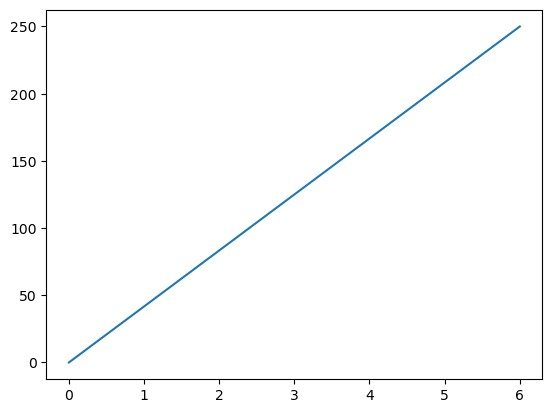

In [7]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array([0, 6])
ypoints = np.array([0, 250])

plt.plot(xpoints, ypoints)
plt.show()

In [ ]:
transform = transforms.Compose([transforms.Resize((224, 224)),
                                transforms.ToTensor()])
my_dataset = CustomDataSet('/Users/tanishsurana/Desktop/mlpcw7/mlp-project/dataset/', transform=transform)
dataloader = torch.utils.data.DataLoader(my_dataset , batch_size=15, shuffle=False, 
                               num_workers=0, drop_last=True)




In [108]:
features = np.array(vgg16_feature_list)
print(features.shape)

(1733, 4096)


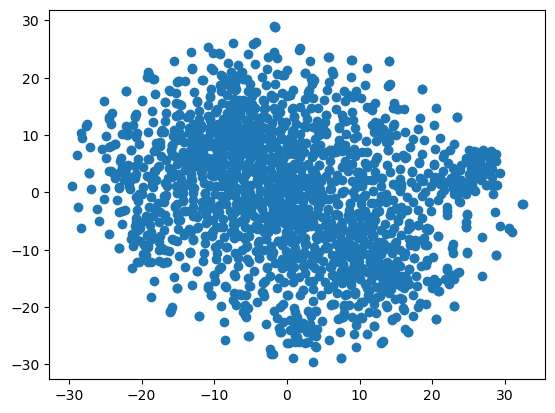

In [109]:
# model = torchvision.models.resnet18(pretrained=True)
# model.eval()
# features = []



# with torch.no_grad():
#     for _, images in enumerate(dataloader):
#         outputs = model(images)
#         features.append(outputs)
# features = torch.cat(features, dim=0)



from sklearn.manifold import TSNE
import matplotlib.pyplot as plt



tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=0).fit_transform(features)

plt.scatter(tsne[:, 0], tsne[:, 1])
plt.show()

In [110]:
tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))


In [ ]:
import torchvision.transforms as T
images = []
transform = T.ToPILImage()

for label, img in enumerate(dataloader):
    bs = img.shape[0]
    for i in range(bs):
        temp = transform(img[i])
        images.append(temp)


0 -1gyxuGDs1U.png
1 -20vpHtC4GU.png
2 -4xbUzeMkLE.png
3 -4zrvLIvs4c.png
4 -AkTLfreP2M.png
5 -c0e7821tHs.png
6 -DZZOhbZpz4.png
7 -ems0XN7ivQ.png
8 -fDVHJoZArg.png
9 -Jl2Hc2DTKc.png
10 -ldA6PCa1kM.png
11 -lPqD0Kj-gA.png
12 -LqbAMHGMTk.png
13 -nd7n0gqAmI.png
14 -O9qlFkYMPg.png
15 -paxCX-EJcE.png
16 -QTo3nfmWUc.png
17 -S4CwK5Z5Xg.png
18 -SAc83Sv1ww.png
19 -T-nJ2Wpw7k.png
20 -TfgtjrXCHk.png
21 -Vke4kc-Cc4.png
22 -VU3lYS4z3E.png
23 -W1aoln1Txc.png
24 -Xb6JoucBXM.png
25 -xBAM1TRSKA.png
26 -xl0Com4ElM.png
27 -ZgukO7zXPw.png
28 -_I4hECDZ_E.png
29 0291oTRmNyE.png
30 02iom7ai1k0.png
31 0573pkeSWeE.png
32 0BT0wtCFg7g.png
33 0cZQ2cwB2-E.png
34 0DEeNLbFuRc.png
35 0DPwPc0_D4Y.png
36 0fo8z8AYY8I.png
37 0NFChQD9-tI.png
38 0nLoRgi1f78.png
39 0Nnu3YnYvxQ.png
40 0nsgnqskJHY.png
41 0NXvJ2rLmbo.png
42 0OGwJI2m1MM.png
43 0PAMO_BYf4c.png
44 0PJeUvSlH0Y.png
45 0qUB9aSKtmY.png
46 0VIlQrx-MJA.png
47 0vzkrpTuBC8.png
48 0Y5YY0qC76A.png
49 0ZsSCFAJUvQ.png
50 1-heRW4pZGE.png
51 1-s-xpgT7EE.png
52 10jc_azxfhk.png
53 

C:\Users\rawal\AppData\Local\Temp\ipykernel_30156\4047769678.py:21: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)


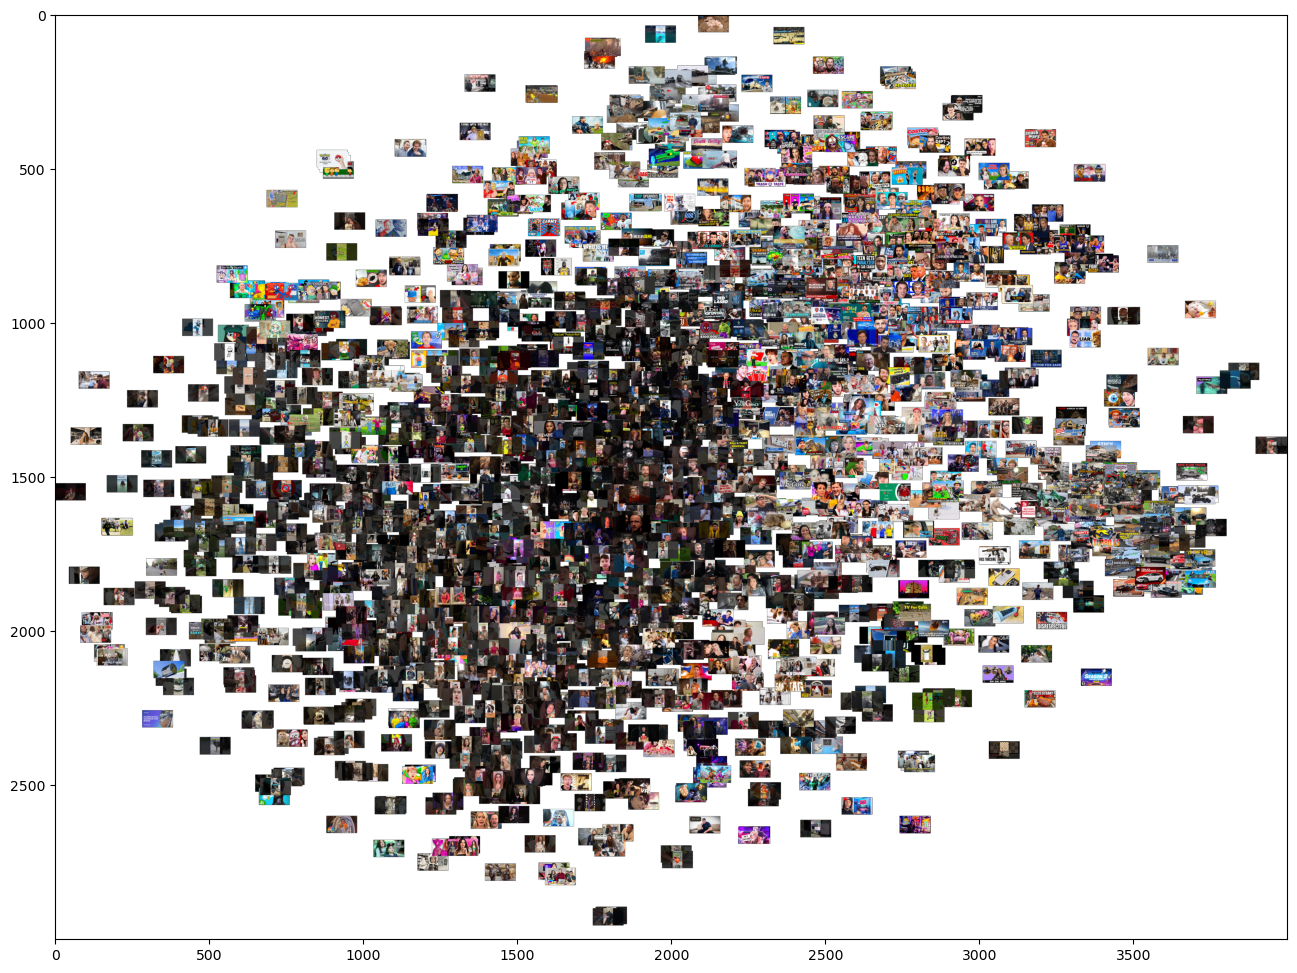

In [114]:
r = 1
from PIL import Image

width = int(4000*r)
height = int(3000*r)
max_dim = 100
images = []
for i, filename  in enumerate(os.listdir('dataset')):
    print(i,filename)
    # process the files under the directory 'dogs' or 'cats'
    #     # ...
        
    img = image.load_img('dataset\\'+filename)
    images.append(img)
full_image = Image.new('RGBA', (width, height))


for img, x, y in zip(images, tx, ty):
    tile = img
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

plt.figure(figsize = (16,12))
plt.imshow(full_image)